In [473]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)
from mlxtend.classifier import StackingClassifier

In [347]:
traindata = pd.read_pickle("./traindata.pkl")

In [348]:
traindata.sample(5)

,Name,Age,past_surgery,Lefty,win_percent,ERA,games_played,h_ip,bb_ip,so_ip,...,Max_Speed,Changeup,Curve,Sinker,Cutter,Fastball,Splitter,Knuckle,Slider,injured
2005,Leonel Campos,28.0,0,0,0.333333,6.623333,25,9.333333,6.60,10.133333,...,86.0,0.050210,0.000,0.0,0.0,0.568107,0.0,0.0,0.368271,1
261,Drew Storen,26.0,0,0,0.667000,2.820000,133,8.250000,2.30,7.900000,...,91.0,0.140500,0.000,0.0,0.0,0.557500,0.0,0.0,0.302000,0
1153,J.R. Graham,25.0,0,0,0.500000,4.950000,39,10.300000,3.00,7.500000,...,97.0,0.009337,0.000,0.0,0.0,0.591036,0.0,0.0,0.316527,0
1644,Brandon Cunniff,27.0,0,0,0.750000,4.435000,54,7.150000,5.25,9.000000,...,94.0,0.041878,0.000,0.0,0.0,0.433966,0.0,0.0,0.335835,0
293,Evan Marshall,24.0,0,0,0.500000,2.740000,57,9.100000,3.10,9.900000,...,94.0,0.213000,0.163,0.0,0.0,0.624000,0.0,0.0,0.000000,0


# Oversampling

In [366]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)
Counter(y_resampled)

Counter({0: 1339, 1: 1339})

In [474]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

## Logistic Regression

In [475]:
log_model_balanced = lm.fit(X_resampled_scaled, y_resampled)

In [369]:
log_model_balanced.score(X_val_scaled,y_val)

0.6732456140350878

In [370]:
y_predict = log_model_balanced.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.526984126984127

In [371]:
y_predict = log_model_balanced.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.4278,   Recall: 0.6860
ROC AUC score: 0.6773 


In [372]:
kf = KFold(n_splits=5, shuffle=True, random_state = 11)
scores = cross_val_score(log_model_balanced, X_resampled_scaled, y_resampled, cv=kf, scoring='roc_auc')

print(scores)
print(scores.mean())

[0.73331938 0.69135777 0.70257029 0.70684411 0.73513053]
0.7138444135331373


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

## KNN

In [373]:
knn_model_balanced = knn.fit(X_resampled_scaled, y_resampled)

In [374]:
knn_model_balanced.score(X_val_scaled,y_val)

0.6337719298245614

In [375]:
y_predict = knn_model_balanced.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.4338983050847458

In [376]:
y_predict = knn_model_balanced.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.3678,   Recall: 0.5289
ROC AUC score: 0.6003 


In [377]:
knn = KNeighborsClassifier(n_neighbors=3)

In [378]:
kf = KFold(n_splits=5, shuffle=True, random_state = 11)
scores = cross_val_score(knn_model_balanced, X_resampled_scaled, y_resampled, cv=kf, scoring='roc_auc')

print(scores)
print(scores.mean())

[0.79766939 0.75991072 0.77307891 0.79202058 0.75015373]
0.7745666638526381


## Naive Bayes

In [379]:
mnb = MultinomialNB()
mnb_model_balanced = mnb.fit(X_resampled, y_resampled)

In [380]:
mnb_model_balanced.score(X_val, y_val)

0.6359649122807017

In [381]:
y_predict = mnb_model_balanced.predict(X_val)
f1_score(y_val,y_predict)

0.4539473684210526

In [382]:
y_predict = mnb_model_balanced.predict(X_val)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.3770,   Recall: 0.5702
ROC AUC score: 0.6150 


In [383]:
gnb = GaussianNB()
gnb_model_balanced = gnb.fit(X_resampled_scaled, y_resampled)

In [384]:
gnb_model_balanced.score(X_val_scaled, y_val)

0.5745614035087719

In [385]:
y_predict = gnb_model_balanced.predict(X_val_scaled)
f1_score(y_val,y_predict)

0.5025641025641026

In [386]:
y_predict = gnb_model_balanced.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.3643,   Recall: 0.8099
ROC AUC score: 0.6497 


In [387]:
kf = KFold(n_splits=5, shuffle=True, random_state = 11)
scores = cross_val_score(gnb_model_balanced, X_resampled_scaled, y_resampled, cv=kf, scoring='roc_auc')

print(scores)
print(scores.mean())

[0.72013816 0.6827729  0.68601118 0.65550276 0.72754206]
0.6943934140851854


## SVM

In [388]:
Cs = np.arange(9,10,.01)
gammas = np.arange(0.0001, 0.0002, 0.0001)
param_grid = {'C': Cs, 'gamma' : gammas}

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_resampled_scaled, y_resampled)
grid_search.best_params_

print(grid_search.best_params_)

In [435]:
svm = SVC(kernel="linear", C=9.22, gamma=0.0001, probability=True)
svm_model_balanced = svm.fit(X_resampled_scaled, y_resampled)

In [436]:
svm_model_balanced.score(X_val_scaled,y_val)

0.6710526315789473

In [437]:
y_predict = svm_model_balanced.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.5481927710843374

In [438]:
y_predict = svm_model_balanced.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.4313,   Recall: 0.7521
ROC AUC score: 0.6969 


In [439]:
kf = KFold(n_splits=5, shuffle=True, random_state = 11)
scores = cross_val_score(svm_model_balanced, X_resampled_scaled, y_resampled, cv=kf, scoring='roc_auc')

print(scores)
print(scores.mean())

[0.73015142 0.6910779  0.70123218 0.7051061  0.73944882]
0.7134032844731815


In [440]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

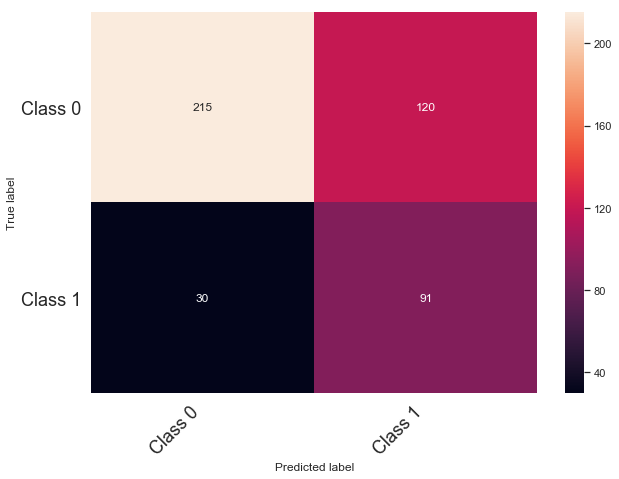

In [396]:
cm = print_confusion_matrix(confusion_matrix(y_val, y_predict), ['Class 0', 'Class 1'])

## Random Forest

In [397]:
randomforest = RandomForestClassifier()
rand_for_model_balanced = randomforest.fit(X_resampled_scaled,y_resampled)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [398]:
rand_for_model_balanced.score(X_val_scaled,y_val)

0.7171052631578947

In [399]:
y_predict = rand_for_model_balanced.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.37073170731707317

In [400]:
y_predict = rand_for_model_balanced.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.4524,   Recall: 0.3140
ROC AUC score: 0.5884 


In [403]:
kf = KFold(n_splits=5, shuffle=True, random_state = 11)
scores = cross_val_score(rand_for_model_balanced, X_resampled_scaled, y_resampled, cv=kf, scoring='roc_auc')

print(scores)
print(scores.mean())

[0.92938385 0.93376992 0.94411998 0.94346565 0.93251439]
0.9366507601042763


# Synthetic Oversampling

In [425]:
X_smoted, y_smoted = SMOTE(random_state=11).fit_sample(X_scaled,y)

Counter(y_smoted)

Counter({0: 1339, 1: 1339})

In [476]:
smote_svm = SVC(probability=True).fit(X_smoted, y_smoted)

In [427]:
smote_svm.score(X_val_scaled, y_val)

0.7083333333333334

In [428]:
y_predict = smote_svm.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.5429553264604812

In [429]:
y_predict = smote_svm.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.4647,   Recall: 0.6529
ROC AUC score: 0.6906 


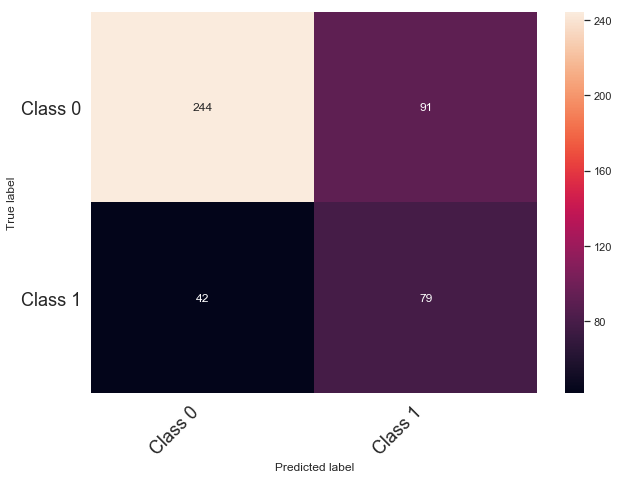

In [409]:
cm = print_confusion_matrix(confusion_matrix(y_val, y_predict), ['Class 0', 'Class 1'])

In [430]:
X_adasyn, y_adasyn = ADASYN(random_state=11).fit_sample(X_scaled,y)

In [477]:
adasyn_svm = SVC(probability=True).fit(X_adasyn, y_adasyn)

In [432]:
adasyn_svm.score(X_val_scaled, y_val)

0.6820175438596491

In [433]:
y_predict = adasyn_svm.predict(X_val_scaled)
f1_score(y_val, y_predict)

0.5482866043613708

In [434]:
y_predict = adasyn_svm.predict(X_val_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_val, y_predict)))

Precision: 0.4400,   Recall: 0.7273
ROC AUC score: 0.6965 


## Ensembling

In [415]:
pickle.dump(log_model_balanced, open('log_model_balanced.pkl', 'wb'))
pickle.dump(knn_model_balanced, open('knn_model_balanced.pkl', 'wb'))
pickle.dump(gnb_model_balanced, open('gnb_model_balanced.pkl', 'wb'))
pickle.dump(svm_model_balanced, open('svm_model_balanced.pkl', 'wb'))
pickle.dump(rand_for_model_balanced, open('rand_for_model_balanced.pkl', 'wb'))
pickle.dump(smote_svm, open('smote_svm.pkl', 'wb'))
pickle.dump(adasyn_svm, open('adasyn_svm.pkl', 'wb'))

In [416]:
model_names = ["log_model_balanced", "knn_model_balanced", "gnb_model_balanced", "svm_model_balanced", "rand_for_model_balanced", "smote_svm", "adasyn_svm"]

for model in model_names:
    with open(f"{model}.pkl", "rb") as pfile:
        exec(f"{model} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [417]:
for model in model_names:
    curr_model = eval(model)
    print(f'{model} score: {curr_model.score(X_val_scaled, y_val)}')

log_model_balanced score: 0.6732456140350878
knn_model_balanced score: 0.6337719298245614
gnb_model_balanced score: 0.5745614035087719
svm_model_balanced score: 0.6710526315789473
rand_for_model_balanced score: 0.7171052631578947
smote_svm score: 0.7083333333333334
adasyn_svm score: 0.6820175438596491


### Max Voting

In [449]:
voting_classifer = VotingClassifier(estimators= model_list, voting='hard', n_jobs=-1)
voting_classifer.fit(X_resampled_scaled, y_resampled)

VotingClassifier(estimators=[('log_model_balanced', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)),...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [450]:
y_pred = voting_classifer.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.668859649122807

## Test Set

In [478]:
testdata = pd.read_pickle("./testdata.pkl")

In [479]:
testdata.head(10)

,Name,Age,past_surgery,Lefty,win_percent,ERA,games_played,h_ip,bb_ip,so_ip,...,Max_Speed,Changeup,Curve,Sinker,Cutter,Fastball,Splitter,Knuckle,Slider,injured
0,A.J. Achter,27.0,0,0,0.666667,4.376667,45,9.966667,3.166667,5.633333,...,92.0,0.274412,0.000000,0.000000,0.077207,0.431930,0.0,0.0,0.149580,0
1,A.J. Burnett,38.0,0,0,0.449000,3.690000,90,8.633333,3.300000,8.533333,...,91.0,0.074545,0.228333,0.166467,0.000000,0.431949,0.0,0.0,0.000000,0
2,A.J. Cole,25.0,0,0,0.236000,4.923333,22,10.333333,3.000000,8.500000,...,93.0,0.108826,0.105452,0.000000,0.000353,0.465216,0.0,0.0,0.184095,1
3,A.J. Griffin,29.0,1,0,0.573000,4.946667,73,8.433333,3.066667,7.633333,...,86.0,0.114454,0.216908,0.000000,0.026592,0.550025,0.0,0.0,0.087599,0
4,A.J. Minter,23.0,0,1,0.000000,3.000000,16,7.800000,1.200000,15.600000,...,92.0,0.000000,0.000000,0.000000,0.487903,0.512097,0.0,0.0,0.000000,0
5,A.J. Morris,29.0,0,0,0.000000,6.300000,7,8.100000,7.200000,8.100000,...,89.0,0.000000,0.000000,0.000000,0.526042,0.281250,0.0,0.0,0.192708,0
6,A.J. Schugel,28.0,0,0,0.500000,3.533333,73,10.933333,3.733333,6.866667,...,82.0,0.339528,0.068658,0.546519,0.000000,0.034825,0.0,0.0,0.000000,0
7,Aaron Barrett,27.0,1,0,0.750000,3.630000,90,7.950000,3.250000,10.750000,...,95.0,0.016353,0.000000,0.000000,0.000000,0.390979,0.0,0.0,0.369979,0
8,Aaron Blair,25.0,0,0,0.111000,11.295000,16,12.750000,9.700000,7.450000,...,81.0,0.164613,0.154239,0.000000,0.000000,0.266447,0.0,0.0,0.120000,0
9,Aaron Brooks,25.0,0,0,0.143000,25.208333,28,26.283333,5.850000,6.500000,...,0.0,0.203715,0.026904,0.000000,0.000000,0.515020,0.0,0.0,0.158316,0


In [480]:
X_test = testdata.drop(columns=['Name', 'injured'], axis=1)
y_test = testdata.injured

In [481]:
X = traindata.drop(columns=['Name', 'injured'], axis=1)
y = traindata.injured

In [482]:
X.head()

,Age,past_surgery,Lefty,win_percent,ERA,games_played,h_ip,bb_ip,so_ip,avg_innings_per_game,avg_batters_per_game,Max_Speed,Changeup,Curve,Sinker,Cutter,Fastball,Splitter,Knuckle,Slider
0,25.0,0,0,1.000,3.270,7,11.5,2.5,4.1,1.571429,7.00000,92.0,0.213,0.0000,0.0,0.000,0.6210,0.0,0.0,0.166
1,37.0,0,0,0.392,3.945,64,8.2,3.6,8.9,6.318627,27.10000,91.0,0.068,0.3425,0.0,0.000,0.5895,0.0,0.0,0.000
2,25.0,0,0,0.583,3.830,32,7.7,2.4,7.7,6.250000,25.71875,86.0,0.138,0.1590,0.0,0.023,0.5860,0.0,0.0,0.095
3,26.0,0,0,1.000,2.660,50,7.3,4.4,10.8,0.804000,3.48000,95.0,0.018,0.0000,0.0,0.000,0.6370,0.0,0.0,0.345
4,24.0,0,0,0.000,43.880,2,40.5,10.1,6.8,1.100000,12.00000,0.0,0.195,0.0120,0.0,0.000,0.6210,0.0,0.0,0.172


In [483]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [484]:
svm = LinearSVC(C=9.22)
clf = CalibratedClassifierCV(svm) 
svm_model_balanced = clf.fit(X_scaled, y_resampled)

In [333]:
svm_model_balanced.score(X_test_scaled,y_test)

0.7201800450112528

In [334]:
y_predict = svm_model_balanced.predict(X_test_scaled)
f1_score(y_test, y_predict)

0.48693259972489694

In [335]:
y_predict = svm_model_balanced.predict(X_test_scaled)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(y_test, y_predict)))

Precision: 0.3774,   Recall: 0.6860
ROC AUC score: 0.7072 


In [336]:
pickle.dump(svm_model_balanced, open('svm_model_balanced.pkl', 'wb'))

In [451]:
lfpr,ltpr, thresholds = roc_curve(y_val, log_model_balanced.predict_proba(X_val_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_val, svm_model_balanced.predict_proba(X_val_scaled)[:,1])
rfpr,rtpr, thresholds = roc_curve(y_val, rand_for_model_balanced.predict_proba(X_val_scaled)[:,1])
sfpr,stpr, thresholds = roc_curve(y_val, smote_svm.predict_proba(X_val_scaled)[:,1])
afpr,atpr, thresholds = roc_curve(y_val, adasyn_svm.predict_proba(X_val_scaled)[:,1])
kfpr,ktpr, thresholds = roc_curve(y_val, knn_model_balanced.predict_proba(X_val_scaled)[:,1])

ROC AUC score =  0.6612998016946098


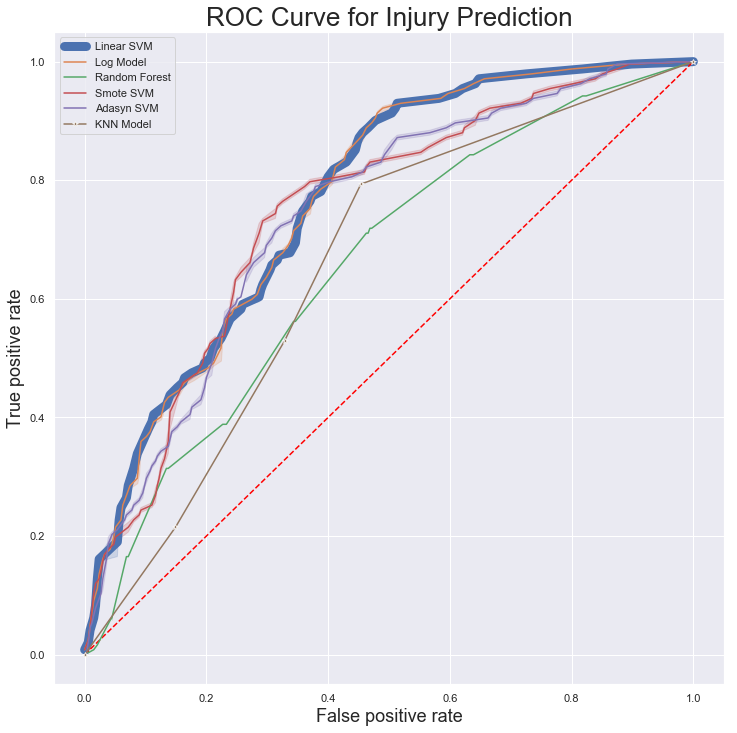

In [472]:
sns.set(rc={"lines.linewidth": 1.5})

fig, ax = plt.subplots(figsize=[12,12])

sns.lineplot(fpr, tpr, linewidth= 9.0, label="Linear SVM")
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(lfpr, ltpr, label="Log Model")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(rfpr, rtpr, label="Random Forest")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(sfpr, stpr, label="Smote SVM")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(afpr, atpr, label="Adasyn SVM")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(kfpr, ktpr, marker="*",label="KNN Model")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC Curve for Injury Prediction', fontsize=26);
print("ROC AUC score = ", roc_auc_score(y_test, svm_model_balanced.predict_proba(X_test)[:,1]))
plt.savefig('ROC.jpg')